# Validacao dos paths

In [174]:
import pandas as pd

In [175]:
from os import walk
file1 = "../data/dados_covid/HIST_PAINEL_COVIDBR_2020_Parte1_15set2022.csv"
file2 = "../data/dados_covid/HIST_PAINEL_COVIDBR_2020_Parte2_15set2022.csv"
files_covid = [file1, file2]

lista_df = [pd.read_csv(file, sep=";") for file in files_covid]
df_covid = pd.concat(lista_df)



In [176]:
from scipy import stats
def avaliar_corr(df, coluna_base):

    corr_df = pd.DataFrame(columns = ["r", "p"])

    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            r, p = stats.pearsonr(df[coluna_base], df[col])
            corr_df.loc[col] = [round(r,4), p ]
    
    return corr_df

In [177]:
df_covid = df_covid[df_covid["codmun"].notna()]

In [178]:
df_arr_mun = pd.read_csv("../data/integrado/arr_mun.csv")

In [179]:
df_covid[df_covid["data"]=="2020-04-07"].to_csv("analise_covid3.csv", index=False)

In [180]:
df = df_covid[df_covid["data"]=="2020-04-15"]

In [181]:
df.sort_values(by='casosAcumulado', ascending=False).head(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
492758,Sudeste,SP,São Paulo,35,355030.0,35016.0,SAO PAULO,2020-04-15,16,12252023.0,7764,1059,558,46,NaN,NaN,1.0
418082,Sudeste,RJ,Rio de Janeiro,33,330455.0,33005.0,METROPOLITANA I,2020-04-15,16,6718903.0,2519,126,167,27,NaN,NaN,1.0
125728,Nordeste,CE,Fortaleza,23,230440.0,23001.0,1ª REGIAO FORTALEZA,2020-04-15,16,2669342.0,1946,152,93,7,NaN,NaN,1.0
18667,Norte,AM,Manaus,13,130260.0,13001.0,"MANAUS, ENTORNO E ALTO RIO NEGRO",2020-04-15,16,2182763.0,1350,55,92,11,NaN,NaN,1.0
208278,Nordeste,PE,Recife,26,261160.0,26010.0,RECIFE,2020-04-15,16,1645727.0,857,124,62,13,NaN,NaN,1.0
714373,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-04-15,16,3015268.0,682,31,17,0,NaN,NaN,1.0
85596,Nordeste,MA,São Luís,21,211130.0,21016.0,SAO LUIS,2020-04-15,16,1101884.0,533,141,34,2,NaN,NaN,1.0
280541,Nordeste,BA,Salvador,29,292740.0,29020.0,SALVADOR,2020-04-15,16,2872347.0,519,94,0,-13,NaN,NaN,1.0
299337,Sudeste,MG,Belo Horizonte,31,310620.0,31016.0,BELO HORIZONTE/ NOVA LIMA/ CAETE,2020-04-15,16,2512070.0,380,7,6,0,NaN,NaN,1.0
633093,Sul,RS,Porto Alegre,43,431490.0,43010.0,REGIAO 10,2020-04-15,16,1483771.0,346,19,8,0,NaN,NaN,1.0


In [182]:
df_custos_sp = pd.read_csv("data/custos_sp.csv")

In [183]:
df_custos_sp["totalCost"] = abs(df_custos_sp["totalCost"])
df_custos_sp['cod_mun_destino'] = df_custos_sp['cod_mun_destino'] // 10

In [184]:
df_custos_sp.sort_values(by='totalCost', ascending=False).head(10)

,index,cod_mun_origem,cod_mun_destino,totalCost,cod_nos,costs
4717,0,3550308,355030,1.000000,[3550308],[-1.0]
4690,0,3550308,330455,0.191450,"[3550308,3304557]","[-1.0,-0.1914498118571103]"
4529,0,3550308,530010,0.065940,"[3550308,5300108]","[-1.0,-0.0659403561218135]"
4677,0,3550308,431490,0.061256,"[3550308,4314902]","[-1.0,-0.06125579900203264]"
4576,0,3550308,420540,0.033051,"[3550308,4205407]","[-1.0,-0.03305115257282853]"
4540,0,3550308,350950,0.033018,"[3550308,3509502]","[-1.0,-0.033018433131901226]"
4694,0,3550308,292740,0.031363,"[3550308,2927408]","[-1.0,-0.03136335439708387]"
4582,0,3550308,520870,0.028147,"[3550308,5208707]","[-1.0,-0.028147265320115168]"
4751,0,3550308,320530,0.023796,"[3550308,3205309]","[-1.0,-0.023795518633050128]"
4325,0,3550308,317020,0.019244,"[3550308,3170206]","[-1.0,-0.019243731632703764]"


In [185]:
df_teste = df_custos_sp.merge(
    df,
    how='inner', 
    left_on=["cod_mun_destino"], 
    right_on=["codmun"]
    )

In [186]:
#removendo sao paulo
df_teste2 = df_teste[df_teste["cod_mun_destino"]!=355030]

In [187]:
df_teste_uf = df_teste2.groupby(['coduf'])[["casosAcumulado","totalCost"]].sum()

<AxesSubplot: xlabel='casosAcumulado', ylabel='totalCost'>

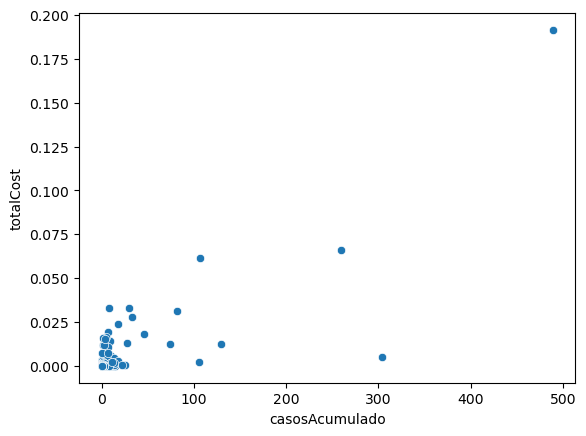

In [112]:
sns.scatterplot(data=df_teste2, x="casosAcumulado", y="totalCost")

In [30]:
df_teste_uf

,casosAcumulado,totalCost
coduf,,
11,6,0.001102
12,25,0.000907
13,111,0.002177
14,12,0.000763
15,13,0.003119
16,4,0.000731
17,9,0.001404
21,14,0.002112
22,11,0.002079


<AxesSubplot: xlabel='casosAcumulado', ylabel='totalCost'>

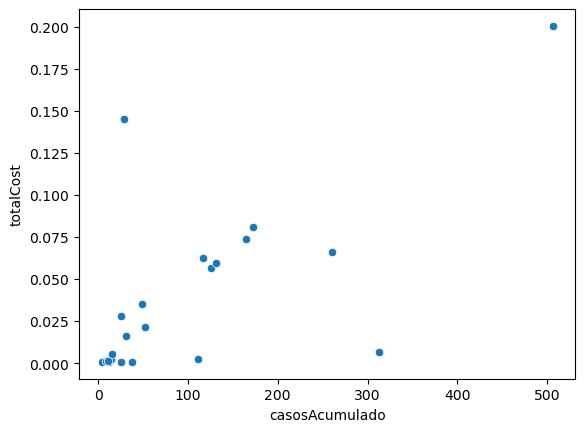

In [115]:
#plot
import seaborn as sns
sns.scatterplot(data=df_teste_uf, x="casosAcumulado", y="totalCost")


In [119]:
df_custos_sp

,index,cod_mun_origem,cod_mun_destino,totalCost,cod_nos,costs
0,0,3550308,3100104,-1.131395e-05,"[3550308,3170206,3100104]","[-1.0,-0.019243731632703764,-1.13139533116879E-5]"
1,0,3550308,5200100,-1.680039e-05,"[3550308,5300108,5200100]","[-1.0,-0.0659403561218135,-1.6800389007553412E-5]"
2,0,3550308,3100203,-3.638206e-05,"[3550308,3100203]","[-1.0,-3.6382064911708175E-5]"
3,0,3550308,1500107,-4.925154e-06,"[3550308,5300108,1501402,1500107]","[-1.0,-0.0659403561218135,-0.00175744149192196..."
4,0,3550308,2300101,-5.802090e-07,"[3550308,3509502,2307304,2300101]","[-1.0,-0.033018433131901226,-1.784056631240547..."
...,...,...,...,...,...,...
4776,0,3550308,4317103,-4.897399e-05,"[3550308,4314902,4317103]","[-1.0,-0.06125579900203264,-4.897399113401171E-5]"
4777,0,3550308,4124400,-3.279092e-05,"[3550308,3170206,4124400]","[-1.0,-0.019243731632703764,-3.27909203467346E-5]"
4778,0,3550308,4318002,-1.535603e-05,"[3550308,4314902,4318002]","[-1.0,-0.06125579900203264,-1.5356025527049943..."
4779,0,3550308,1304062,-4.342363e-05,"[3550308,5300108,1302603,1304062]","[-1.0,-0.0659403561218135,-0.00196029891871356..."


#### E 15 dias depois?

In [126]:

df2 = df_covid[df_covid["data"]=="2020-04-15"]

df_teste3 = df_custos_sp.merge(
    df2,
    how='inner', 
    left_on=["cod_mun_destino"], 
    right_on=["codmun"]
    )
df_teste4 = df_teste3[df_teste3["cod_mun_destino"]!=355030]

#Por cidade
print("Person")
print(df_teste3[["casosAcumulado","totalCost"]].corr(method ='pearson'))
print(" ")
print("Spearman")
print(df_teste3[["casosAcumulado","totalCost"]].corr(method ='spearman'))


Person
                casosAcumulado  totalCost
casosAcumulado         1.00000    0.94644
totalCost              0.94644    1.00000
 
Spearman
                casosAcumulado  totalCost
casosAcumulado        1.000000   0.351045
totalCost             0.351045   1.000000


In [ ]:
sns.scatterplot(data=df_teste_uf, x="casosAcumulado", y="totalCost")

## Fazendo uma analize mais qualitativa

In [139]:
df_qual_top20 = df_teste.sort_values(by='totalCost', ascending=False)[:20]

In [142]:
print("Person")
print(df_qual_top20[["casosAcumulado","totalCost"]].corr(method ='pearson'))
print(" ")
print("Spearman")
print(df_qual_top20[["casosAcumulado","totalCost"]].corr(method ='spearman'))

Person
                casosAcumulado  totalCost
casosAcumulado        1.000000   0.958613
totalCost             0.958613   1.000000
 
Spearman
                casosAcumulado  totalCost
casosAcumulado        1.000000   0.604739
totalCost             0.604739   1.000000


In [158]:
#Removendo São Paulo
df_qual_top20_no_sp = df_teste2.sort_values(by='totalCost', ascending=False)[:20]
df_qual_top10_no_sp = df_teste2.sort_values(by='totalCost', ascending=False)[:10]

In [156]:
print("Person")
print(df_qual_top20_no_sp[["casosAcumulado","totalCost"]].corr(method ='pearson'))
print(" ")
print("Spearman")
print(df_qual_top20_no_sp[["casosAcumulado","totalCost"]].corr(method ='spearman'))

Person
                casosAcumulado  totalCost
casosAcumulado        1.000000   0.924523
totalCost             0.924523   1.000000
 
Spearman
                casosAcumulado  totalCost
casosAcumulado        1.000000   0.556057
totalCost             0.556057   1.000000


<AxesSubplot: xlabel='casosAcumulado', ylabel='totalCost'>

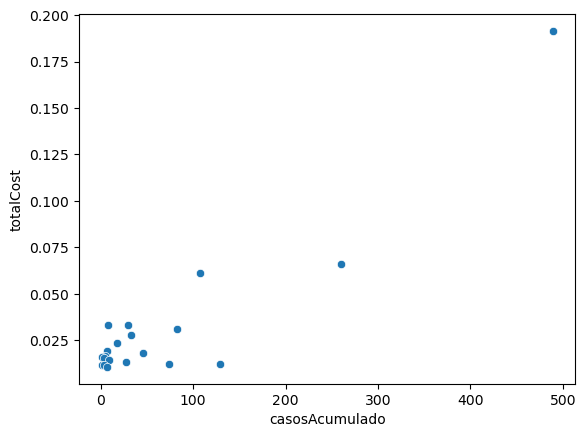

In [157]:
sns.scatterplot(data=df_qual_top20_no_sp, x="casosAcumulado", y="totalCost")

In [150]:
avaliar_corr(df_qual_top20[["casosAcumulado","totalCost"]], "casosAcumulado")

,r,p
casosAcumulado,1.0000,0.000000e+00
totalCost,0.9586,2.910964e-11


In [146]:
df_qual_top10 = df_teste.sort_values(by='totalCost', ascending=False)[:10]

In [151]:
avaliar_corr(df_qual_top10[["casosAcumulado","totalCost"]], "casosAcumulado")

,r,p
casosAcumulado,1.0000,1.063504e-62
totalCost,0.9615,9.220089e-06


<AxesSubplot: xlabel='casosAcumulado', ylabel='totalCost'>

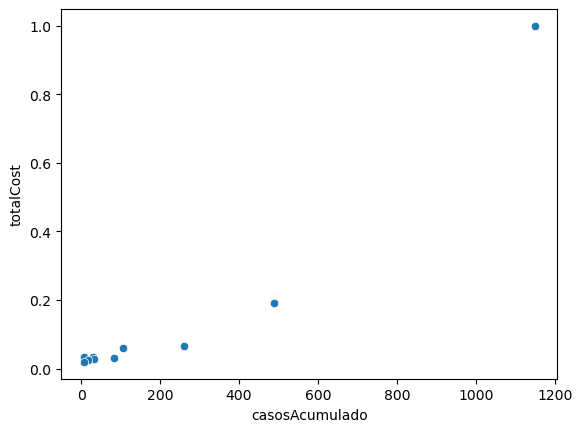

In [154]:
sns.scatterplot(data=df_qual_top10, x="casosAcumulado", y="totalCost")

In [148]:
print("Person")
print(df_qual_top10[["casosAcumulado","totalCost"]].corr(method ='pearson'))
print(" ")
print("Spearman")
print(df_qual_top10[["casosAcumulado","totalCost"]].corr(method ='spearman'))

Person
                casosAcumulado  totalCost
casosAcumulado        1.000000   0.961452
totalCost             0.961452   1.000000
 
Spearman
                casosAcumulado  totalCost
casosAcumulado        1.000000   0.866667
totalCost             0.866667   1.000000


In [159]:
print("Person")
print(df_qual_top10_no_sp[["casosAcumulado","totalCost"]].corr(method ='pearson'))
print(" ")
print("Spearman")
print(df_qual_top10_no_sp[["casosAcumulado","totalCost"]].corr(method ='spearman'))

Person
                casosAcumulado  totalCost
casosAcumulado        1.000000   0.955421
totalCost             0.955421   1.000000
 
Spearman
                casosAcumulado  totalCost
casosAcumulado        1.000000   0.660606
totalCost             0.660606   1.000000


<AxesSubplot: xlabel='casosAcumulado', ylabel='totalCost'>

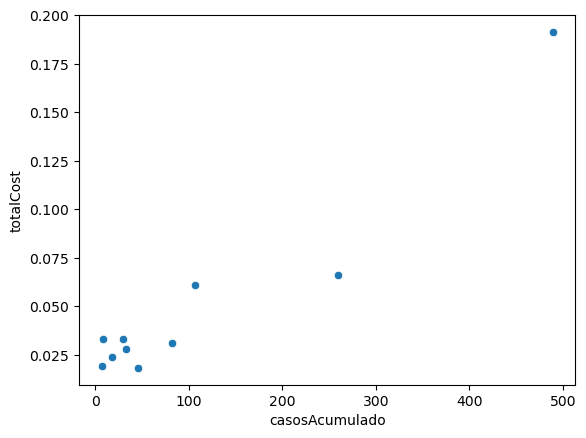

In [160]:
import seaborn as sns
sns.scatterplot(data=df_qual_top10_no_sp, x="casosAcumulado", y="totalCost")

### Merge dos top 20 de casa

In [171]:
df_acumulado_top50_no_sp = df_teste2.sort_values(by='casosAcumulado', ascending=False)[:50]
df_qual_top50_no_sp = df_teste2.sort_values(by='totalCost', ascending=False)[:50]


df_merge = df_acumulado_top50_no_sp.merge(
    df_qual_top50_no_sp,
    how='inner', 
    left_on=["codmun"], 
    right_on=["codmun"]
    )


In [172]:
df_merge

,index_x,cod_mun_origem_x,cod_mun_destino_x,totalCost_x,cod_nos_x,costs_x,regiao_x,estado_x,municipio_x,coduf_x,...,data_y,semanaEpi_y,populacaoTCU2019_y,casosAcumulado_y,casosNovos_y,obitosAcumulado_y,obitosNovos_y,Recuperadosnovos_y,emAcompanhamentoNovos_y,interior/metropolitana_y
0,0,3550308,330455,0.191450,"[3550308,3304557]","[-1.0,-0.1914498118571103]",Sudeste,RJ,Rio de Janeiro,33,...,2020-03-28,13,6718903.0,489,489,9,9,NaN,NaN,1.0
1,0,3550308,230440,0.004949,"[3550308,3304557,2304400]","[-1.0,-0.1914498118571103,-0.0049494339014691255]",Nordeste,CE,Fortaleza,23,...,2020-03-28,13,2669342.0,304,304,4,4,NaN,NaN,1.0
2,0,3550308,530010,0.065940,"[3550308,5300108]","[-1.0,-0.0659403561218135]",Centro-Oeste,DF,Brasília,53,...,2020-03-28,13,3015268.0,260,260,0,0,NaN,NaN,1.0
3,0,3550308,310620,0.012537,"[3550308,3106200]","[-1.0,-0.012537039811135573]",Sudeste,MG,Belo Horizonte,31,...,2020-03-28,13,2512070.0,129,129,0,0,NaN,NaN,1.0
4,0,3550308,431490,0.061256,"[3550308,4314902]","[-1.0,-0.06125579900203264]",Sul,RS,Porto Alegre,43,...,2020-03-28,13,1483771.0,107,107,2,2,NaN,NaN,1.0
5,0,3550308,130260,0.001960,"[3550308,5300108,1302603]","[-1.0,-0.0659403561218135,-0.001960298918713569]",Norte,AM,Manaus,13,...,2020-03-28,13,2182763.0,105,105,0,0,NaN,NaN,1.0
6,0,3550308,292740,0.031363,"[3550308,2927408]","[-1.0,-0.03136335439708387]",Nordeste,BA,Salvador,29,...,2020-03-28,13,2872347.0,82,82,0,0,NaN,NaN,1.0
7,0,3550308,410690,0.012388,"[3550308,4106902]","[-1.0,-0.012387604752572046]",Sul,PR,Curitiba,41,...,2020-03-28,13,1933105.0,74,74,0,0,NaN,NaN,1.0
8,0,3550308,261160,0.018314,"[3550308,2611606]","[-1.0,-0.01831446288412837]",Nordeste,PE,Recife,26,...,2020-03-28,13,1645727.0,46,46,4,4,NaN,NaN,1.0
9,0,3550308,520870,0.028147,"[3550308,5208707]","[-1.0,-0.028147265320115168]",Centro-Oeste,GO,Goiânia,52,...,2020-03-28,13,1516113.0,33,33,0,0,NaN,NaN,1.0


### Correlação 

In [188]:
df_teste2[["casosAcumulado","totalCost"]]

,casosAcumulado,totalCost
0,0,1.131395e-05
1,0,1.680039e-05
2,1,3.638206e-05
3,3,4.925154e-06
4,0,5.802090e-07
...,...,...
4776,7,4.897399e-05
4777,0,3.279092e-05
4778,0,1.535603e-05
4779,3,4.342363e-05


In [189]:
#Por cidade
print("Person")
print(df_teste2[["casosAcumulado","totalCost"]].corr(method ='pearson'))
print(" ")
print("Spearman")
print(df_teste2[["casosAcumulado","totalCost"]].corr(method ='spearman'))


Person
                casosAcumulado  totalCost
casosAcumulado        1.000000   0.727597
totalCost             0.727597   1.000000
 
Spearman
                casosAcumulado  totalCost
casosAcumulado        1.000000   0.350456
totalCost             0.350456   1.000000


In [191]:
df_teste_uf

,casosAcumulado,totalCost
coduf,,
11,69,0.001102
12,101,0.000907
13,1554,0.002177
14,114,0.000763
15,339,0.003119
16,290,0.000731
17,26,0.001404
21,566,0.002112
22,75,0.002079


In [190]:
#Por estado
print("Person")
print(df_teste_uf.corr(method ='pearson'))
print(" ")
print("Spearman")
print(df_teste_uf.corr(method ='spearman'))

Person
                casosAcumulado  totalCost
casosAcumulado        1.000000   0.648566
totalCost             0.648566   1.000000
 
Spearman
                casosAcumulado  totalCost
casosAcumulado        1.000000   0.624332
totalCost             0.624332   1.000000


## Casos Iniciais - dataset mais limitado

In [39]:
df_covid_inicial = pd.read_csv("data/brazil_covid19.csv")

In [173]:
df_covid_inicial.head(50)

,date,region,state,cases,deaths
0,2020-02-25,Centro-Oeste,DF,0.0,0
1,2020-02-25,Centro-Oeste,GO,0.0,0
2,2020-02-25,Centro-Oeste,MS,0.0,0
3,2020-02-25,Centro-Oeste,MT,0.0,0
4,2020-02-25,Nordeste,AL,0.0,0
5,2020-02-25,Nordeste,BA,0.0,0
6,2020-02-25,Nordeste,CE,0.0,0
7,2020-02-25,Nordeste,MA,0.0,0
8,2020-02-25,Nordeste,PB,0.0,0
9,2020-02-25,Nordeste,PE,0.0,0


In [57]:
df_semana_1 = df_covid_inicial[df_covid_inicial.date=="2020-03-15"]

In [58]:
df_semana_1

,date,region,state,cases,deaths
513,2020-03-15,Centro-Oeste,DF,8.0,0
514,2020-03-15,Centro-Oeste,GO,3.0,0
515,2020-03-15,Centro-Oeste,MS,0.0,0
516,2020-03-15,Centro-Oeste,MT,0.0,0
517,2020-03-15,Nordeste,AL,1.0,0
518,2020-03-15,Nordeste,BA,2.0,0
519,2020-03-15,Nordeste,CE,0.0,0
520,2020-03-15,Nordeste,MA,0.0,0
521,2020-03-15,Nordeste,PB,0.0,0
522,2020-03-15,Nordeste,PE,2.0,0


In [43]:
df_teste_uf2 = df_teste.groupby(['coduf', 'estado'])[["casosAcumulado","totalCost"]].sum()

In [44]:
df_teste_uf2

,,casosAcumulado,totalCost
coduf,estado,,
11,RO,6,0.001102
12,AC,25,0.000907
13,AM,111,0.002177
14,RR,12,0.000763
15,PA,13,0.003119
16,AP,4,0.000731
17,TO,9,0.001404
21,MA,14,0.002112
22,PI,11,0.002079


## Testando significancia

In [77]:
df_res = avaliar_corr(df_teste2[["totalCost", "casosAcumulado"]], "casosAcumulado")
df_res

,r,p
totalCost,0.8314,0.0
casosAcumulado,1.0000,0.0


In [79]:
df_res = avaliar_corr(df_teste_uf[["totalCost", "casosAcumulado"]], "casosAcumulado")
df_res


,r,p
totalCost,0.6952,0.000057
casosAcumulado,1.0000,0.000000


# Superspreader cities

In [92]:
#Analisar o caso de São Paulo
df_spread_sp = pd.read_csv("data/calc_SI_3550308.csv")
df_spread_sp['cod_cidade'] = df_spread_sp['cod_cidade'] // 10


In [93]:
df_dia30 = df_covid[df_covid["data"]=="2020-03-28"]
df_dia60 = df_covid[df_covid["data"]=="2020-04-28"]

In [94]:
df_analise30 = df_spread_sp.merge(
    df_dia30,
    how='inner', 
    left_on=["cod_cidade"], 
    right_on=["codmun"]
    )

In [98]:
df_analise60 = df_spread_sp.merge(
    df_dia60,
    how='inner', 
    left_on=["cod_cidade"], 
    right_on=["codmun"]
    )

In [102]:
df_res = avaliar_corr(df_analise30[["dia_29", "casosAcumulado"]], "casosAcumulado")
df_res

,r,p
dia_29,0.8683,0.0
casosAcumulado,1.0000,0.0


In [110]:
df_analise30[["dia_29", "casosAcumulado"]].corr('spearman')

,dia_29,casosAcumulado
dia_29,1.00000,0.23636
casosAcumulado,0.23636,1.00000


In [104]:
df_res = avaliar_corr(df_analise60[["dia_59", "casosAcumulado"]], "casosAcumulado")
df_res

,r,p
dia_59,0.8595,0.0
casosAcumulado,1.0000,0.0


In [111]:
df_analise60[["dia_59", "casosAcumulado"]].corr('spearman')

,dia_59,casosAcumulado
dia_59,1.000000,0.313436
casosAcumulado,0.313436,1.000000


In [105]:
#Não acho que essa avaliacao seja boa
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
print("\tExplained variance:", explained_variance_score(df_analise30["dia_29"], df_analise30["casosAcumulado"]))
print("\tMean absolute error:", mean_absolute_error(df_analise30["dia_29"], df_analise30["casosAcumulado"]))
print("\tR2 score:", r2_score(df_analise30["dia_29"], df_analise30["casosAcumulado"]))

	Explained variance: -38.86138684293594
	Mean absolute error: 0.6594498009402003
	R2 score: -38.92271935917616


<AxesSubplot: xlabel='casosAcumulado', ylabel='dia_29'>

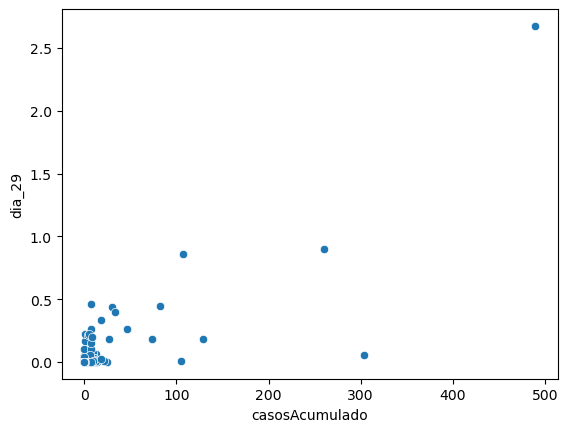

In [109]:
import seaborn as sns
df_analise30_no_sp = df_analise30[df_analise30["cod_cidade"]!=355030]
sns.scatterplot(data=df_analise30_no_sp, x="casosAcumulado", y="dia_29")